<center>
<img src="Escudo.jpg" width="300px" heigth="300px">    
<h1>Simulación de Sistemas y Laboratorio</h1>
<h2>UdeA</h2>
<h3>2018-II</h3>
</center>

### Profesor: Julián D. Arias Londoño

## Material introductorio para los laboratorios de Machine Learning

## Introducción

Iniciamos importanto algunas de las librerías que más útiles serán a lo largo del curso.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

# Manejo de vectores y matrices en numpy

In [2]:
# Indexar un vector manualmente

v1 = np.array([3,-1,2])
v2= np.array([2,-1,3])
#print v1


# Indexar una matriz manualmente 2x3

m1 = np.array([[1,2,3],[0.5,0.3,2.1]])
#print m1

# suma y resta de vectores

suma1 = v1 + v2 #(para la resta usamos -)
#print suma1

# producto de dos vectores.

prod1 = v1*v2
#print prod1

prod1 = np.dot(v1,v2)
#print prod1

#Ahora para matrices
m1 = np.array([[1,2,3],[3,2,1]]) #[2x3]
print np.shape(m1)

m2 = np.array([[1,2],[2,1],[3,1]]) # [3x2]
print np.shape(m2)

#print m1*m2
print np.dot(m1,m2)


(2, 3)
(3, 2)
[[14  7]
 [10  9]]


El siguiente código produce error debido a que la operación de multiplicación matricial no se puede realizar 

In [3]:
m3 = np.array([[1,2],[2,1]]) # [3x2]
print np.shape(m3)

#print m1*m2
print np.dot(m1,m3)


(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

Si no reconocemos el error o es difícil encontrarlo, una alternativa es usar pixiedust para hacer debugging del código

In [4]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.
Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [6]:
%%pixie_debugger
m3 = np.array([[1,2],[2,1]]) # [3x2]
print np.shape(m3)

#print m1*m2
print np.dot(m1.T,m3)


In [7]:
print(m3*m3)

[[1 4]
 [4 1]]


Cuidado con la asignación de variables, python usa variables referenciadas. Si se requiere hacer una copia se debe usar el método ".copy". Dependiendo de si se trabajo con python 2.7 o 3, la sintaxis puede ser diferente.

In [15]:
m4 = m1
m4[0,1] = 9
print m1
print "---"
m5 = np.copy(m1)
m5[1,1] = 9
print m4
print "---"
print m5

[[1 9 3]
 [3 2 1]]
---
[[1 9 3]
 [3 2 1]]
---
[[1 9 3]
 [3 9 1]]


## Indexación

In [16]:
m1[0,:]*m2[:,0]

array([ 1, 18,  9])

In [17]:
b = m2[:,0][:, np.newaxis]
print b
print "----"
print m1[0,:]*b

[[1]
 [2]
 [3]]
----
[[ 1  9  3]
 [ 2 18  6]
 [ 3 27  9]]


In [18]:
a = np.random.rand(10,8)
b = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18]])
print a[0:3,4:8]
print "----"
print b[0:2,0:6:2]

[[0.22073119 0.2946857  0.95779468 0.93626923]
 [0.11558772 0.67096003 0.55595163 0.7255254 ]
 [0.22673702 0.34049026 0.75061018 0.69059012]]
----
[[ 1  3  5]
 [ 7  9 11]]


In [19]:
 a[np.ix_([1,3,4],[0,2])]

array([[0.45884729, 0.24770282],
       [0.97110553, 0.28922553],
       [0.17305406, 0.24956943]])

In [20]:
v = np.random.permutation(8)
print a[:,v>4]

[[0.25505113 0.55739229 0.57306175]
 [0.45884729 0.03107436 0.24770282]
 [0.22610958 0.7082638  0.46170118]
 [0.97110553 0.39606417 0.28922553]
 [0.17305406 0.77837338 0.24956943]
 [0.67483072 0.37243515 0.0834639 ]
 [0.36543377 0.15862391 0.52098371]
 [0.48115861 0.48287648 0.00457346]
 [0.78556071 0.68432105 0.0306156 ]
 [0.56237522 0.88502049 0.58664562]]


#### Métodos importantes

In [21]:
print m1.max()

print m1.max(0)

print m1.max(1)

#similar con min

9
[3 9 3]
[9 3]


In [22]:
#ones

#diag

#unique

#linalg.inv #Inversa de matriz

#linalg.svd #Descomposición en valores singulares

#logical_and #Elemento a elelemto

#logical_or #Elemento a elelemto

print np.mean(a, axis=0)
print "----"
print np.mean(a, axis=1)

[0.49535266 0.50544451 0.3047543  0.25318656 0.40994498 0.52848416
 0.62437722 0.65780713]
----
[0.50205328 0.35875908 0.44762353 0.45864082 0.45734015 0.56816159
 0.47876101 0.55998242 0.38577999 0.50708753]


----------------------------------

Ahora utilizaremos la librería matplotlib para hacer algunos ejemplos de gráficas básicas:

$$ y = x $$

$$ y = x^2 $$

$$ y = x^3 $$

Observemos que la variable x solo se carga en la primera celda de código. En adelante se puede usar sin necesidad de ser cargada de nuevo. En la gráfica de $y=x^3$ incluimos el título de la gráfica y los label para los ejes de la misma.

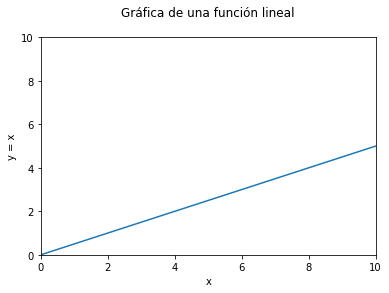

In [23]:


#x = np.array([-2,-1,0,1,2])
x = np.linspace(-10,10,100)
#print x
#f = "hola"
#print f
#Función y = ax + b
y = 0.5*x
plt.plot(x,y)
plt.ylim(0,10)
plt.xlim(0,10)
plt.ylabel('y = x')
plt.xlabel('x')
plt.title(u"Gráfica de una función lineal\n")
plt.show()

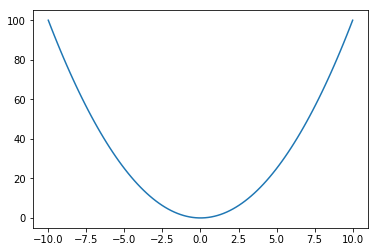

In [24]:
#y = x^2
y = x**2
plt.plot(x,y)
#plt.xlim(-150,150)
plt.show()

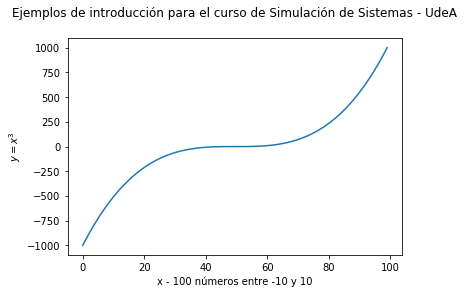

In [25]:
y = x**3
plt.plot(y)
plt.ylabel(r'$y = x^3$')
plt.xlabel(u'x - 100 números entre -10 y 10')
plt.title(u'Ejemplos de introducción para el curso de Simulación de Sistemas - UdeA\n')
plt.show()

Generando gráfica punteada

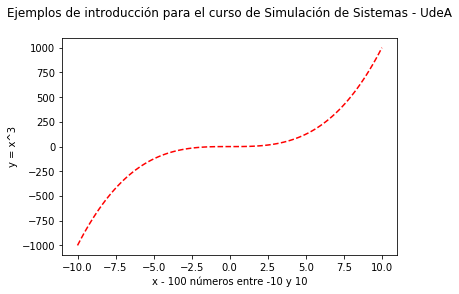

In [26]:
y = x**3
plt.plot(x,y, 'r--')
plt.ylabel('y = x^3')
plt.xlabel(u'x - 100 números entre -10 y 10')
plt.title(u'Ejemplos de introducción para el curso de Simulación de Sistemas - UdeA\n')
plt.show()

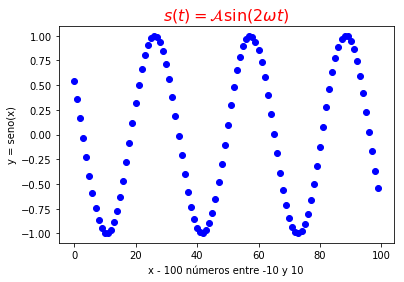

In [27]:
y = np.sin(x)
plt.plot(y, 'bo')
plt.ylabel('y = seno(x)')
plt.xlabel(u'x - 100 números entre -10 y 10')
plt.title(r'$s(t) = \mathcal{A}\sin(2 \omega t)$', fontsize=16, color='r')
plt.show()

Dos gráficas en el mismo plano

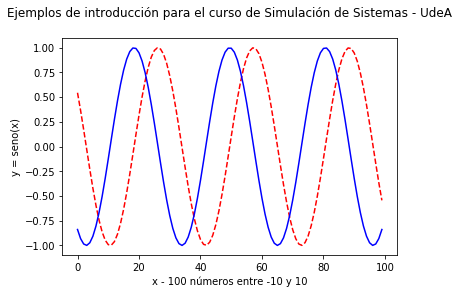

In [28]:
y2 = x
y = np.sin(x)
y1 = np.cos(x)
plt.plot(y, 'r--', y1, 'b-')
plt.ylabel('y = seno(x)')
plt.xlabel(u'x - 100 números entre -10 y 10')
plt.title(u'Ejemplos de introducción para el curso de Simulación de Sistemas - UdeA\n')
plt.show()

Agregando el legend al gráfico

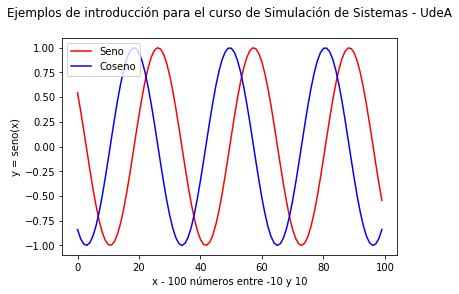

In [29]:
y = np.sin(x)
y1 = np.cos(x)
plt.plot(y, 'r-', label='Seno')
plt.plot(y1, 'b-', label='Coseno')
plt.ylabel('y = seno(x)')
plt.xlabel(u'x - 100 números entre -10 y 10')
plt.title(u'Ejemplos de introducción para el curso de Simulación de Sistemas - UdeA\n')
plt.legend()
plt.show()

Diferentes gráficos

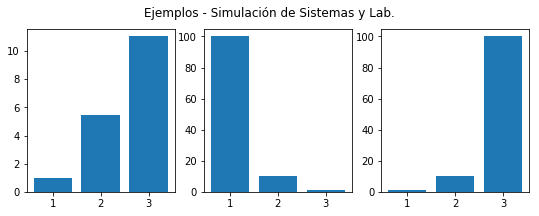

In [30]:
values = np.array([1, 10, 100])
ind = np.arange(3)
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(ind+1, values*np.random.rand(3))

plt.subplot(132)
plt.bar(ind+1, np.flipud(values))
plt.subplot(133)
plt.bar(ind+1, values)

plt.suptitle(u'Ejemplos - Simulación de Sistemas y Lab.')
plt.show()

Gráficos para problemas de clasificación en Machine learning. Scatter plots

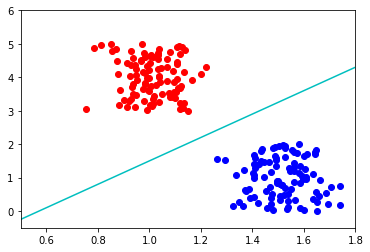

In [31]:
#Creamos los datos artificiales

mu1, sigma1 = 1.5, 0.1
mu2, sigma2 = 1, 0.1
N = 100

x1 = mu1 + sigma1 * np.random.randn(N)
x1line = np.linspace(0,2,N)
x2 = mu2 + sigma2 * np.random.randn(N)
x2line = np.linspace(3,5,N)

#Decision boundary
b = -2
m = 3.5
v = np.linspace(0,100,100)
t = v*m + b

plt.scatter(x1, x1line, c='b')
plt.scatter(x2, x2line, c='r')
plt.plot(v, t, 'c-')
plt.ylim(-0.5, 6, 1)
plt.xlim(0.5, 1.8, 0.2)
plt.show()


# Distribución de probabilidad normal univariada

$P(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma }exp-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}$

Recordar que lo anterior conforma una familia paramétrica con todos los posibles valores de los parámetros $\mu$ y $\sigma$.

Veamos la gráfica de la distribución de la función de densidad de probabilidad normal:



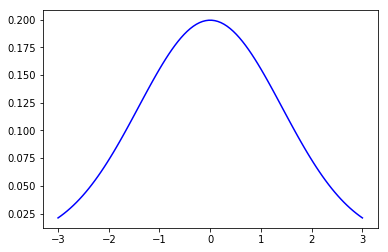

In [32]:

mu, sigma = 0, 2

#Generamos un conjunto de valores x

x = np.linspace(-3,3,100)
#los llevamos a la función de densidad de probabilidad normal
p = ( 1/(np.sqrt(2*np.pi)*sigma) ) * np.exp( (-1/2) * ( ((x - mu) ** 2) / (sigma ** 2) ) )

plt.plot(x, p, 'b-')
plt.show()


Notar que:

1. El domino de la función de densidad de probabilidad normal es cualquier valor real, es decir, $(-\infty, \infty)$

2. La gráfica es simétrica respecto a la media $\mu$

3. Tiene un máximo en la media $\mu$

4. Crece hasta la media $\mu$ y decrece a partir de ella.

5. En los puntos $\mu - \sigma$ y $\mu + \sigma$ presenta puntos de inflexión

6. El eje de abscisas es una asíntota de la curva.

El área bajo la curva es igual a la unidad.

La probabilidad equivale al área encerrada bajo la curva.

$p(\mu - \sigma \lt X \leq \mu + \sigma) = 0.6826 = 68.26\%$

$p(\mu - 2\sigma \lt X \leq \mu + 2\sigma) = 0.954 = 95.4\%$

$p(\mu - 3\sigma \lt X \leq \mu + 3\sigma) = 0.997 = 99.7\%$



Ahora vamos a mirar otros tipos de gráficas muy interesantes.

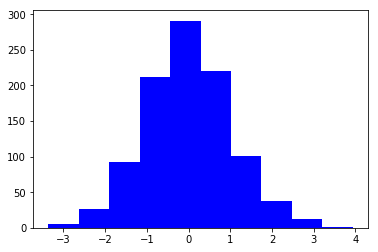

In [33]:
p = np.random.randn(1000)
plt.hist(p, color = 'b')
plt.show()

(150, 4)
150


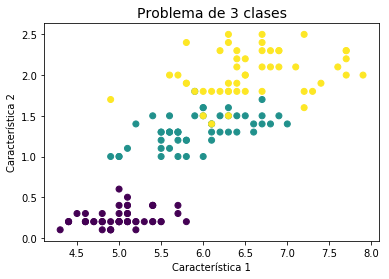

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
print np.shape(X)
print np.size(y)

import matplotlib.pyplot as plt
plt.title('Problema de 3 clases', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Característica 2')
plt.scatter(X[:,0], X[:,3], c=y);
plt.show()


Leyendo una base de datos desde un archivo de texto plano!

In [36]:
#db = np.loadtxt('DB.txt',delimiter='\t')  # Assuming tab-delimiter
#X = db[:,0:12] # fila1 = db[4,0:12]
#Y = db[:,12]
#np.mean(Y)
#np.std(Y)
from StringIO import StringIO   # StringIO behaves like a file object
#c = StringIO("0 1\n2 3")
#print np.loadtxt(c)
c = StringIO("1,0,2\n3,0,4")
z = np.loadtxt(c, delimiter=',')
print z
print '---'
c = StringIO("1,0,2\n3,0,4")
x, y = np.loadtxt(c, delimiter=',', usecols=(0, 2), unpack=True)
print x,y

[[1. 0. 2.]
 [3. 0. 4.]]
---
[1. 3.] [2. 4.]


## Estructuras de datos en Python

In [37]:
# Tuplas

tup = (1, "hola", 3)
print tup[0]
#tup[1] = 2    #Esto es un error

# Listas

lista = [2, 3, 2.5, "Hola"]
print lista[2]
lista[2] = "nuevo"
print lista[2]
# Diccionarios

dic = {"clave": "valor", "1": 324, "2": "Hola"}
print dic["clave"]

#Conjuntos

conjunto = {1, 3, "hola"}
print(conjunto)

1
2.5
nuevo
valor
set([1, 3, 'hola'])


## Condicionales, ciclos y funciones

## IF, Else If, Else

In [38]:
age=18
if age>18:
    
    print("you can enter" )
elif age==18:
    print("go see Pink Floyd")
else:
    print("go see Meat Loaf" )
    

print("move on")

go see Pink Floyd
move on


## Ciclo For

In [39]:
range(5)

dates = [1982,1980,1973]
N=len(dates)

for i in range(N):
     
    print(dates[i])   

1982
1980
1973


In [40]:
for i in range(0,8):
    print(i)

0
1
2
3
4
5
6
7


### Ciclo While

In [41]:
dates = [1982,1980,1973,2000]

i=0;
year=0
while(year!=1973):
    year=dates[i]
    i=i+1
    print(year)
    
    
print("it took ", i ,"repetitions to get out of loop")

1982
1980
1973
('it took ', 3, 'repetitions to get out of loop')


## Lectura y escritura de archivos

In [42]:
example1="Example1.txt"
file1 = open(example1,"r")

for line in file1:
    print line
file1.close()

Inteligencia artificial

IA

TOPIO 2.0.jpg

TOPIO, un robot Humanoide, en la Feria Internacional del Juguete de Núremberg de 2009.

Campo de aplicación	Desarrollo de agentes racionales no vivos

Subárea de	Ciencias de la computación

[editar datos en Wikidata]

La inteligencia artificial (IA), también llamada inteligencia computacional, es la inteligencia exhibida por máquinas. En ciencias de la computación, una máquina «inteligente» ideal es un agente racional flexible que percibe su entorno y lleva a cabo acciones que maximicen sus posibilidades de éxito en algún objetivo o tarea.1​ Coloquialmente, el término inteligencia artificial se aplica cuando una máquina imita las funciones «cognitivas» que los humanos asocian con otras mentes humanas, como por ejemplo: "aprender" y "resolver problemas". 2​ A medida que las máquinas se vuelven cada vez más capaces, tecnología que alguna vez se pensó que requería de inteligencia se elimina de la definición. Por ejemplo, el reconocimiento óptico

In [43]:
with open(example1,"r") as file1:
    FileContent=file1.read()
    print(FileContent)

Inteligencia artificial
IA
TOPIO 2.0.jpg
TOPIO, un robot Humanoide, en la Feria Internacional del Juguete de Núremberg de 2009.
Campo de aplicación	Desarrollo de agentes racionales no vivos
Subárea de	Ciencias de la computación
[editar datos en Wikidata]
La inteligencia artificial (IA), también llamada inteligencia computacional, es la inteligencia exhibida por máquinas. En ciencias de la computación, una máquina «inteligente» ideal es un agente racional flexible que percibe su entorno y lleva a cabo acciones que maximicen sus posibilidades de éxito en algún objetivo o tarea.1​ Coloquialmente, el término inteligencia artificial se aplica cuando una máquina imita las funciones «cognitivas» que los humanos asocian con otras mentes humanas, como por ejemplo: "aprender" y "resolver problemas". 2​ A medida que las máquinas se vuelven cada vez más capaces, tecnología que alguna vez se pensó que requería de inteligencia se elimina de la definición. Por ejemplo, el reconocimiento óptico de car

In [ ]:
## Ejercicio. Escritura y concatenación de un texto en un archivo .txt

## Reto: estudiar la librería Pandas para menejo de Datos

In [ ]:
#df = pd.read_csv